In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime, timedelta

# Configuración inicial
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Descargar datos
print("Descargando datos de DOGE-USD...")
df = yf.download("DOGE-USD", start="2020-01-01", end="2024-12-31")

# Verificar datos
print(f"Datos descargados: {df.shape}")
print(df.head())

[*********************100%***********************]  1 of 1 completed

Descargando datos de DOGE-USD...
Datos descargados: (1826, 5)
Price          Close      High       Low      Open    Volume
Ticker      DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD
Date                                                        
2020-01-01  0.002033  0.002052  0.002021  0.002028  51180941
2020-01-02  0.002009  0.002110  0.001983  0.002034  65071106
2020-01-03  0.002145  0.002177  0.001991  0.002008  62619988
2020-01-04  0.002241  0.002490  0.002050  0.002144  94227582
2020-01-05  0.002419  0.002491  0.002117  0.002240  52631740


In [9]:
# Preparar datos para predicción a 6 días
df = df.copy()
df['Clase'] = df['Close'].shift(-6)  # Precio de cierre 6 días después
df = df.dropna()  # Eliminar filas con NaN

# Crear características
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_21'] = df['Close'].rolling(window=21).mean()
df['Volatility'] = df['Close'].rolling(window=7).std()
df['Price_Change'] = df['Close'].pct_change()

# Eliminar filas con valores NaN
df = df.dropna()

# Variables predictoras
features = ['Close', 'MA_7', 'MA_21', 'Volatility', 'Price_Change']
X = df[features]
y = df['Clase']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (1440, 5), Test size: (360, 5)


In [10]:
# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE del modelo: {mape:.4f} ({mape*100:.2f}%)")

# Coeficientes del modelo
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nCoeficientes del modelo:")
print(coef_df)

MAPE del modelo: 0.0953 (9.53%)

Coeficientes del modelo:
        Feature  Coefficient
0         Close     0.743518
1          MA_7     0.373697
2         MA_21    -0.137164
3    Volatility    -0.350951
4  Price_Change     0.015957


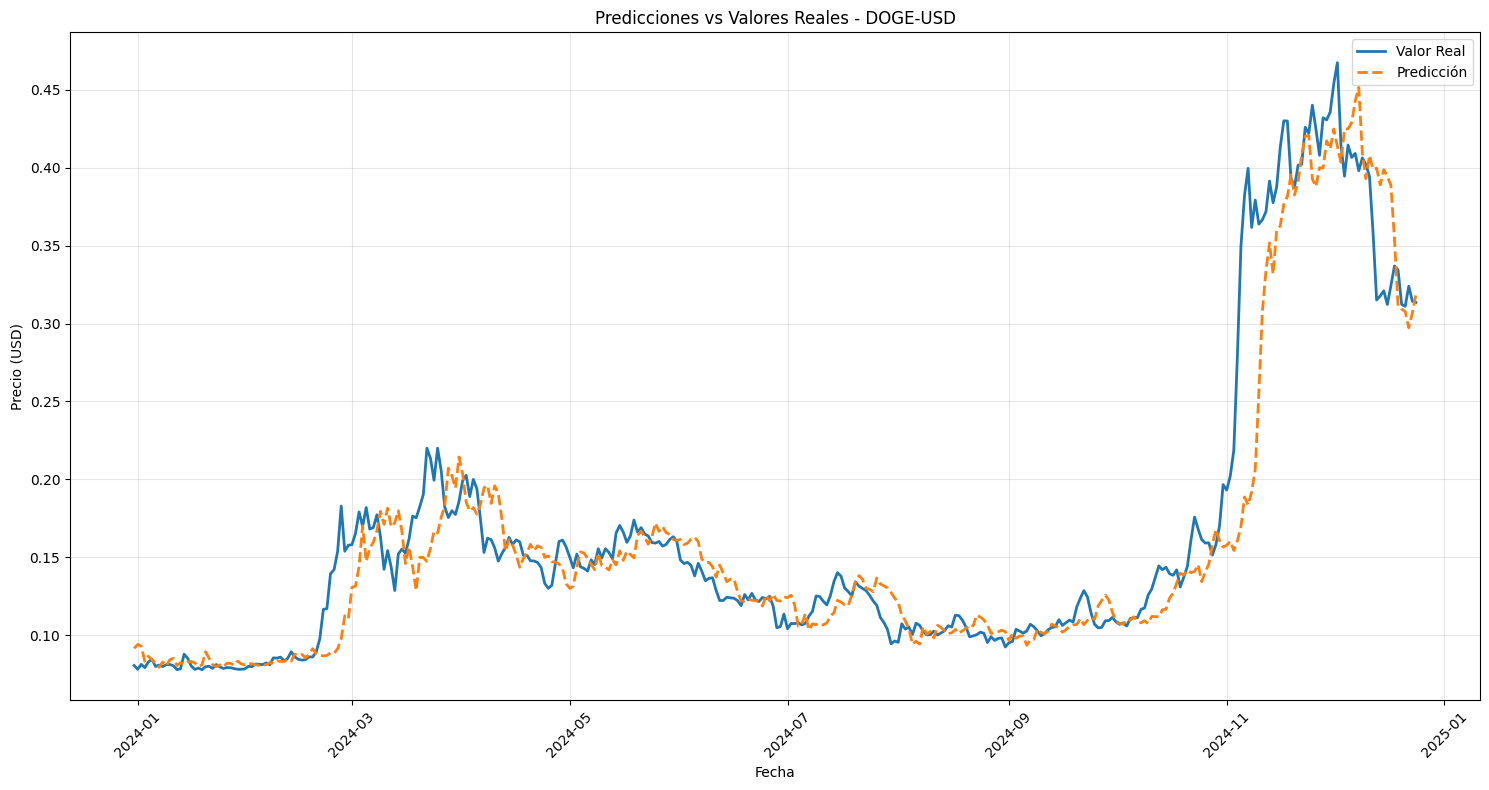

In [11]:
# Gráfico 1: Predicciones vs Real
plt.figure(figsize=(15, 8))
plt.plot(y_test.index, y_test.values, label='Valor Real', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicción', linestyle='--', linewidth=2)
plt.title('Predicciones vs Valores Reales - DOGE-USD')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

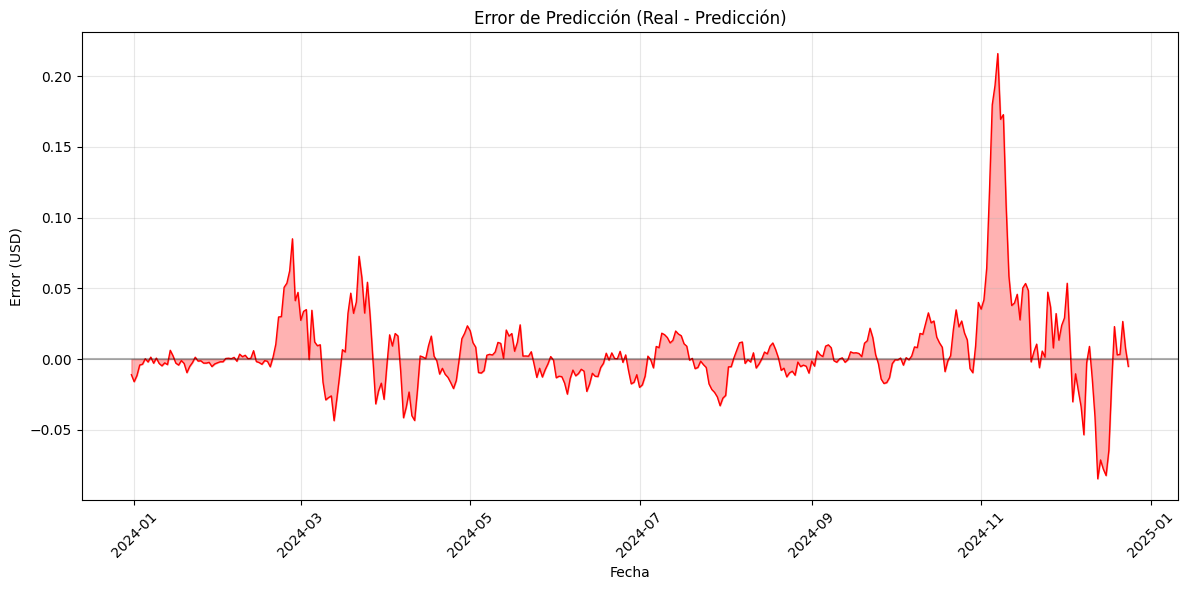

In [12]:
# Gráfico 2: Error de predicción
plt.figure(figsize=(12, 6))
error = y_test.values - y_pred
plt.plot(y_test.index, error, color='red', linewidth=1)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.fill_between(y_test.index, error, 0, alpha=0.3, color='red')
plt.title('Error de Predicción (Real - Predicción)')
plt.xlabel('Fecha')
plt.ylabel('Error (USD)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

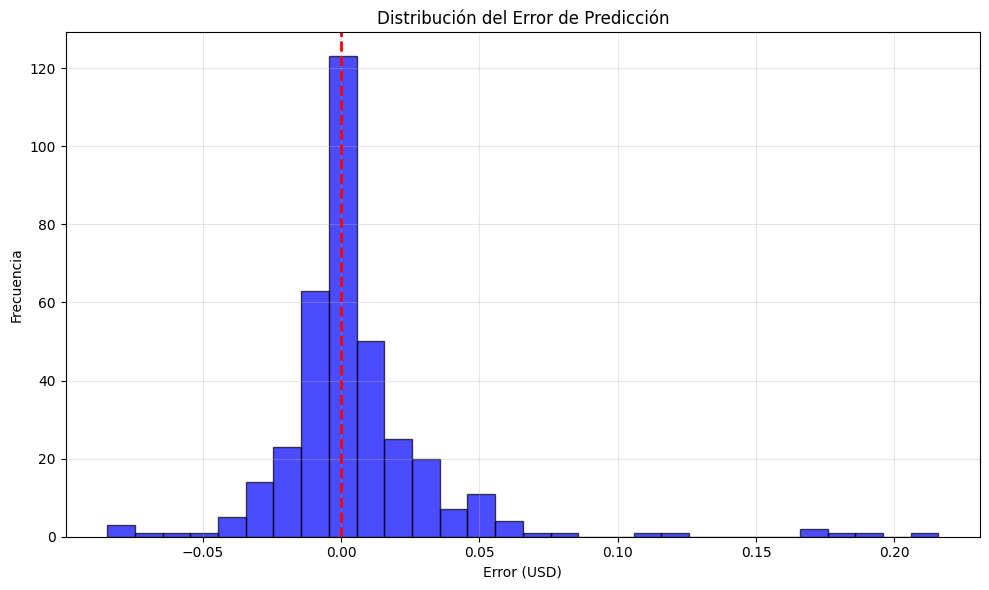

In [13]:
# Gráfico 3: Distribución del error
plt.figure(figsize=(10, 6))
plt.hist(error, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Distribución del Error de Predicción')
plt.xlabel('Error (USD)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Alternativa directa sin bucles complicados
print("\nDatos reales obtenidos:")
print(real_data['Close'].tail(10))  # Ver últimos 10 días reales

print("\nÚltimas 6 predicciones:")
print(y_pred[-6:])

# Tabla manual simple
print("\nComparación simplificada:")
print("2025-01-01 - Predicción:", y_pred[-6])
print("2025-01-02 - Predicción:", y_pred[-5])
print("2025-01-03 - Predicción:", y_pred[-4])
print("2025-01-04 - Predicción:", y_pred[-3])
print("2025-01-05 - Predicción:", y_pred[-2])
print("2025-01-06 - Predicción:", y_pred[-1])


Datos reales obtenidos:
Ticker      DOGE-USD
Date                
2024-12-27  0.311036
2024-12-28  0.323919
2024-12-29  0.314320
2024-12-30  0.313514
2024-12-31  0.315681
2025-01-01  0.324306
2025-01-02  0.338610
2025-01-03  0.379279
2025-01-04  0.394746
2025-01-05  0.382563

Últimas 6 predicciones:
[0.31130631 0.30924326 0.30765058 0.29727524 0.30676709 0.31868146]

Comparación simplificada:
2025-01-01 - Predicción: 0.311306313393094
2025-01-02 - Predicción: 0.3092432581516275
2025-01-03 - Predicción: 0.30765058256756916
2025-01-04 - Predicción: 0.29727524362349406
2025-01-05 - Predicción: 0.3067670910642276
2025-01-06 - Predicción: 0.31868145687392974


In [19]:
# Resumen general
print("\n" + "="*80)
print("RESUMEN GENERAL DEL MODELO")
print("="*80)
print(f"Período analizado: 2020-01-01 al 2024-12-31")
print(f"Variable objetivo: Precio de cierre 6 días después (Clase)")
print(f"Características utilizadas: {features}")
print(f"Tamaño del dataset: {len(df)} registros")
print(f"MAPE (Error porcentual absoluto medio): {mape*100:.2f}%")
print(f"R² Score: {model.score(X_test, y_test):.4f}")
print(f"Intercepto del modelo: {model.intercept_:.6f}")
print(f"\nÚltima fecha de entrenamiento: {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Período predicho: 6 días después de la última fecha")
print("\nCoeficientes del modelo:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.6f}")


RESUMEN GENERAL DEL MODELO
Período analizado: 2020-01-01 al 2024-12-31
Variable objetivo: Precio de cierre 6 días después (Clase)
Características utilizadas: ['Close', 'MA_7', 'MA_21', 'Volatility', 'Price_Change']
Tamaño del dataset: 1800 registros
MAPE (Error porcentual absoluto medio): 9.53%
R² Score: 0.8872
Intercepto del modelo: 0.004397

Última fecha de entrenamiento: 2024-12-24
Período predicho: 6 días después de la última fecha

Coeficientes del modelo:
  Close: 0.743518
  MA_7: 0.373697
  MA_21: -0.137164
  Volatility: -0.350951
  Price_Change: 0.015957
